# Classification : 2 Class

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Input
from keras.backend import clear_session
from keras.optimizers import Adam

* 학습곡선 함수

In [2]:
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

In [3]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.3.csv"
data = pd.read_csv(path)
data.drop(['Age_scale1', 'AgeGroup', 'SibSp','Parch' ], axis = 1, inplace = True)
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## 2.데이터 준비

Sex, Age, Fare 만 이용하여 Survived 를 예측하는 모델을 만들어 봅시다.

### (1) 데이터 준비

In [4]:
target = 'Survived'
features = ['Sex', 'Age', 'Fare']
x = data.loc[:, features]
y = data.loc[:, target]

### (2) 가변수화

In [5]:
x = pd.get_dummies(x, columns = ['Sex'], drop_first = True)
x.head()

,Age,Fare,Sex_male
0,22.0,7.2500,True
1,38.0,71.2833,False
2,26.0,7.9250,False
3,35.0,53.1000,False
4,35.0,8.0500,True


### (3) 데이터분할

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

### (4) Scaling

In [7]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.딥러닝1: 3개 feature

### (1) 모델설계

In [8]:
nfeatures = x_train.shape[1]
nfeatures

3

In [9]:
# 메모리 정리
clear_session()

# Sequential 모델 만들기
model = Sequential( [Input(shape = (nfeatures,)),
                     Dense( 1, activation= 'sigmoid')]) # 통과하면 0 , 1둘중 하나의 값으로 변환됨

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (16.00 B)

 Trainable params: 4 (16.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [ ]:
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy')
# 오차계산방법
# y - y^ 오차가 작으면 err(가중치?) 를 작게 , 오차가 크면 err(가중치?) 를 크게

history = model.fit(x_train, y_train,
                    epochs = 50, validation_split=0.2).history

* 학습결과 그래프

In [ ]:
dl_history_plot(history)

### (3) 예측 및 검증

In [ ]:
pred = model.predict(x_val)
print(pred[:5])

In [ ]:
# activation이 sigmoid --> 0 ~ 1 사이의 확률값.
# 그러므로 cut-off value(보통 0.5)를 기준으로 잘라서 0과 1로 만들어 준다.
pred = np.where(pred >= .5, 1, 0)
print(pred[:5])

In [ ]:
print(classification_report(y_val, pred))

## 4.딥러닝2 : 전체 feature
* 이제 전체 데이터를 가지고 모델링을 시도해 보겠습니다.


### (1) 데이터 전처리

* 데이터 준비

In [10]:
target = 'Survived'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 가변수화

In [11]:
cat_cols = ['Pclass','Sex', 'Embarked']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

* 데이터분할

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 20)

* 스케일링

In [13]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### (2) 모델링

* 모델 설계

In [14]:
n = x_train.shape[1]
n

8

In [15]:
# 메모리 정리
clear_session()

# Sequential 모델
model = Sequential(
    [Input(shape = (n,)), Dense(1 , activation = 'sigmoid')]

)


# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
x.columns

Index(['Age', 'Fare', 'Family', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [22]:
# (옵션) 모델의 가중치 확인
model.get_weights()
# Sequential' object has no attribute 'state_dict'
# model.state_dict()

[array([[-0.9272221 ],
        [ 3.1683855 ],
        [-0.5382229 ],
        [-0.31978834],
        [-1.3898857 ],
        [-2.1755724 ],
        [ 0.6839949 ],
        [-0.15424031]], dtype=float32),
 array([1.8511635], dtype=float32)]

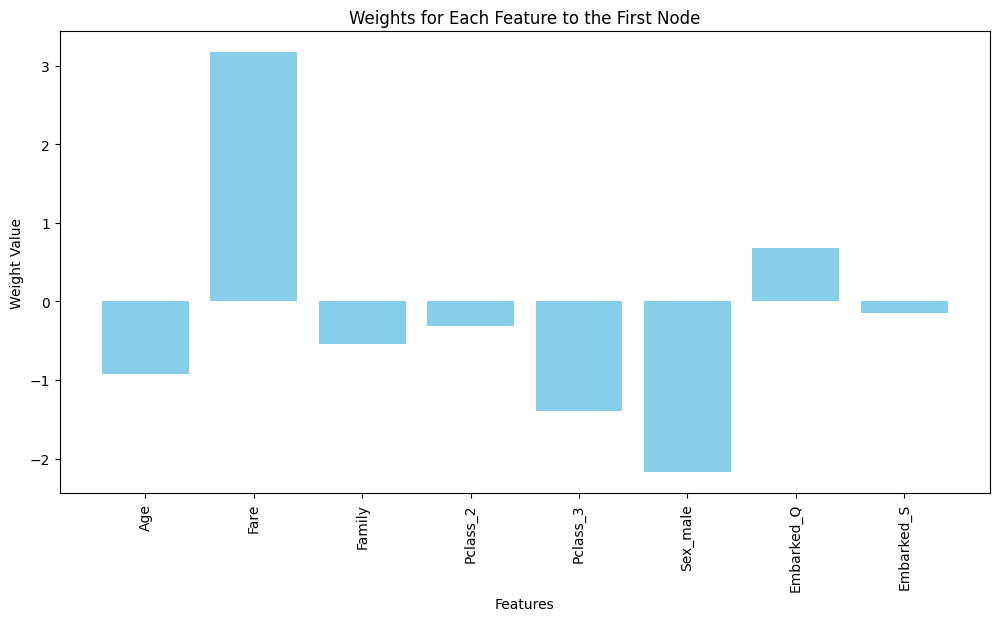

In [28]:
# x의 열 이름 가져오기 (예: ['feature1', 'feature2', ...])
columns = x.columns

# 모델의 가중치 가져오기
weights = model.get_weights()

# 모델이 Dense 층을 사용한다고 가정하고, 첫 번째 층의 가중치를 가져옴
weights_matrix = weights[0]  # 첫 번째 가중치 행렬 (입력층과 첫 은닉층 사이)

# 가중치 데이터프레임 생성
weights_df = pd.DataFrame(weights_matrix, index=columns, columns=[f"Node_{i+1}" for i in range(weights_matrix.shape[1])])

# 특성별로 첫 번째 노드에 대한 가중치의 절대값을 막대그래프로 시각화
plt.figure(figsize=(12, 6))
plt.bar(columns, weights_matrix[:, 0], color='skyblue')  # 첫 번째 노드와의 가중치 시각화
plt.xticks(rotation=90)
plt.title("Weights for Each Feature to the First Node")
plt.xlabel("Features")
plt.ylabel("Weight Value")
plt.show()

* compile + 학습

In [16]:
model.compile(optimizer = Adam(learning_rate= 0.01) , loss = 'binary_crossentropy')
history = model.fit(x_train,y_train, epochs = 50 , validation_split = 0.2 , verbose = False).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.7320 - val_loss: 0.7064
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6904 - val_loss: 0.6731
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6586 - val_loss: 0.6453
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6446 - val_loss: 0.6204
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.6285 - val_loss: 0.5995
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.5927 - val_loss: 0.5817
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5672 - val_loss: 0.5669
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.5513 - val_loss: 0.5536
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5492 - val_loss: 0.5417
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.5520 - val_loss: 0.5325
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.5353 - val_loss: 0.5238
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.536

* 학습결과 그래프

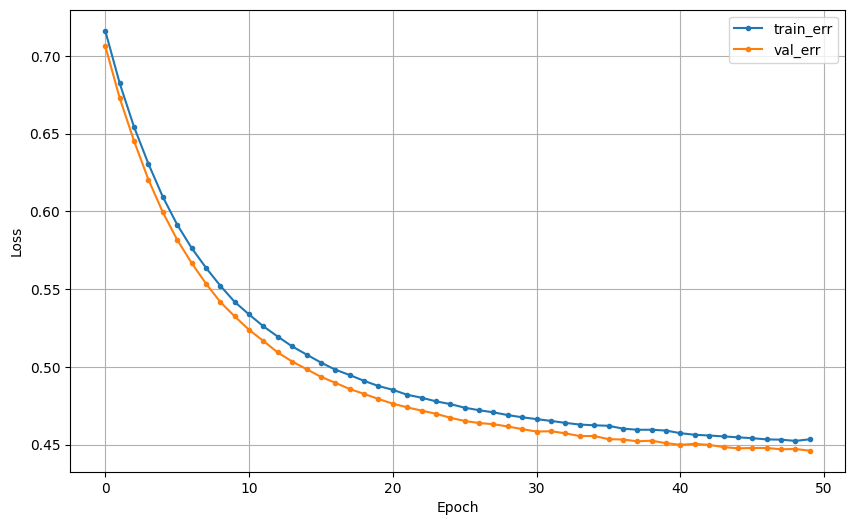

In [17]:
dl_history_plot(history)

* 예측 및 검증

In [18]:
pred = model.predict(x_val)
# 이진분류( 시그모이드 ) 결과 확인시 0.5 이상 이하 분류 필요
pred = np.where(pred >=0.5 , 1,0)

print(classification_report(y_val, pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       170
           1       0.67      0.62      0.65        98

    accuracy                           0.75       268
   macro avg       0.73      0.72      0.73       268
weighted avg       0.75      0.75      0.75       268



----

## 5.딥러닝3 : hidden layer
* 이제 레이어를 추가해 보겠습니다.


### (1) 모델 설계

In [29]:
n = x_train.shape[1]
n

8

In [30]:
# 메모리 정리
clear_session()

# Sequential 모델
model3 = Sequential([Input(shape = (n,)),
                     Dense( 4, activation = 'relu'),
                     Dense( 1, activation = 'sigmoid')])

# 모델요약
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

### (2) compile + 학습

In [31]:
model3.compile( optimizer=Adam(learning_rate= 0.01), loss ='binary_crossentropy')
hist = model3.fit(x_train, y_train, epochs = 50, validation_split=.2 ).history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.6979 - val_loss: 0.6266
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6241 - val_loss: 0.5829
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6079 - val_loss: 0.5464
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5594 - val_loss: 0.5136
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5040 - val_loss: 0.4880
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4905 - val_loss: 0.4746
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4597 - val_loss: 0.4637
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4616 - val_loss: 0.4584
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4206 - val_loss: 0.4488
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4342 - val_loss: 0.4439
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4519 - val_loss: 0.4371
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4574 - val_l

* 학습결과 그래프

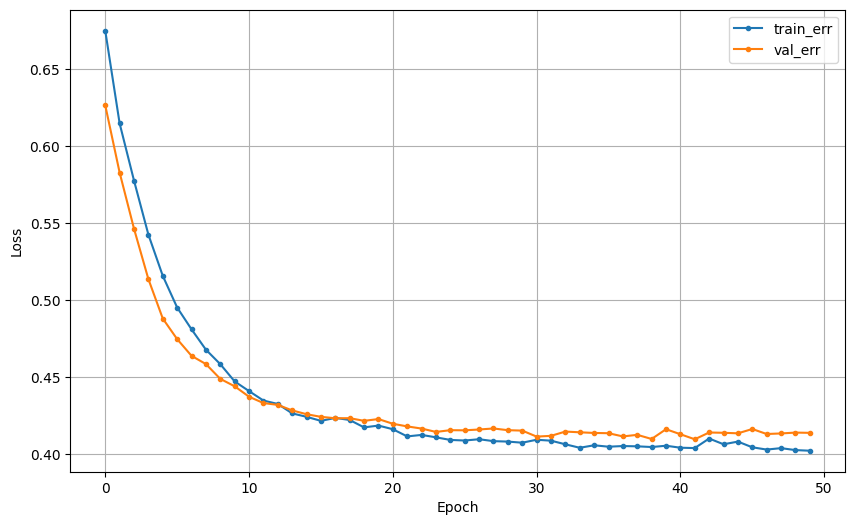

In [32]:
dl_history_plot(hist)

* 예측 및 검증

In [33]:
pred3 = model3.predict(x_val)
pred3 = np.where(pred3 > 0.5, 1, 0)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [34]:
print(classification_report(y_val, pred3))

              precision    recall  f1-score   support

           0       0.78      0.89      0.84       170
           1       0.76      0.57      0.65        98

    accuracy                           0.78       268
   macro avg       0.77      0.73      0.74       268
weighted avg       0.77      0.78      0.77       268



### (3) 실습1

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape | 옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16)  | node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 1) | node, activation = 'sigmoid' |     

In [35]:
clear_session()

# Sequential 모델
model= Sequential([Input(shape = (n,)),
                     Dense( 16, activation = 'relu'),
                     Dense( 1, activation = 'sigmoid')])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
# 컴파일 + 학습
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy') #
# 오차계산방법
# y - y^ 오차가 작으면 err(가중치?) 를 작게 , 오차가 크면 err(가중치?) 를 크게
history = model.fit(x_train, y_train,
                    epochs = 50, validation_split=0.2 , verbose = False).history

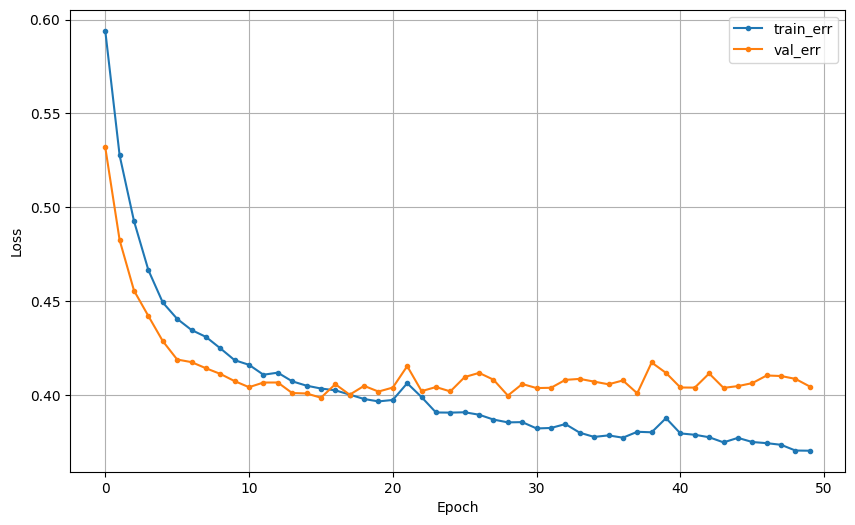

In [37]:
dl_history_plot(history)

In [38]:
pred = model.predict(x_val)
pred = np.where(pred >= .5, 1, 0)
print(classification_report(y_val, pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.78      0.89      0.84       170
           1       0.76      0.57      0.65        98

    accuracy                           0.78       268
   macro avg       0.77      0.73      0.74       268
weighted avg       0.77      0.78      0.77       268



### (4) 실습2

* 다음의 summary를 보고 모델을 설계하시오.

| Layer (type) | Output Shape |  옵션 |
| ---- | ---- | ---- |
| dense (Dense) | (None, 16) |  node, input_shape, activation = 'relu' |
| dense_1 (Dense) | (None, 8) |  node, activation = 'relu'  |
| dense_2 (Dense) | (None, 1) |  node, activation = 'sigmoid'  |

In [39]:
clear_session()

# Sequential 모델
model= Sequential([Input(shape = (n,)),
                     Dense( 16, activation = 'relu'),
                     Dense( 8, activation = 'relu'),
                     Dense( 1, activation = 'sigmoid')])

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 289 (1.13 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# 컴파일 + 학습
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy') #
# 오차계산방법
# y - y^ 오차가 작으면 err(가중치?) 를 작게 , 오차가 크면 err(가중치?) 를 크게
history = model.fit(x_train, y_train,
                    epochs = 50, validation_split=0.2 , verbose = False).history

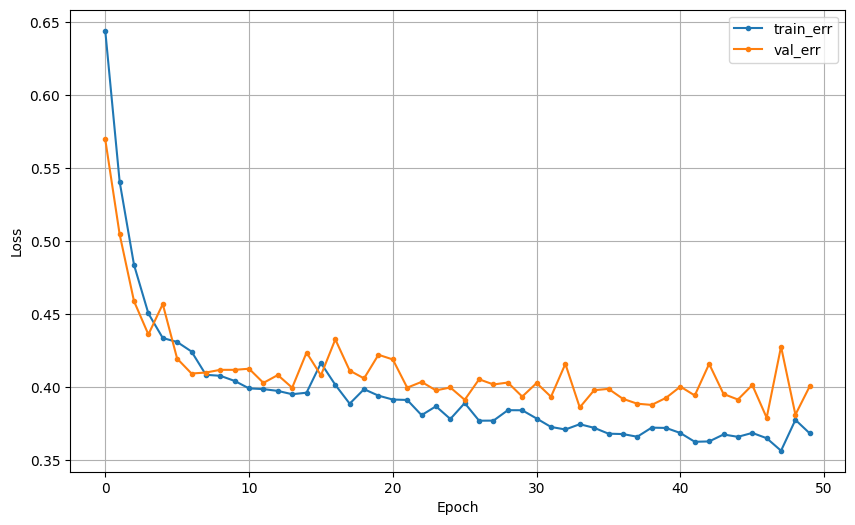

In [42]:
dl_history_plot(history)

In [41]:
pred = model.predict(x_val)
pred = np.where(pred >= .5, 1, 0)
print(classification_report(y_val, pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       170
           1       0.75      0.66      0.70        98

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.79      0.79      0.79       268



### (5) 실습3

* 이번에는 여러분이 원하는 대로 설계하고, 학습해 봅시다.


In [45]:
# 메모리 정리
clear_session()

# Sequential 모델 만들기
model = Sequential( [Input(shape = (n,)),
                     Dense( 32, activation = 'relu'),
                     Dense( 64, activation = 'relu'),
                     Dense( 64, activation = 'relu'),
                     Dense( 2, activation = 'relu'),
                     Dense( 1, activation= 'sigmoid')]) # 통과하면 0 ~1 사이 값으로 변환됨

# 모델요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,693 (26.14 KB)

 Trainable params: 6,693 (26.14 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# 컴파일 + 학습
model.compile(optimizer = Adam(learning_rate=0.01), loss = 'binary_crossentropy') #
# 오차계산방법
# y - y^ 오차가 작으면 err(가중치?) 를 작게 , 오차가 크면 err(가중치?) 를 크게
history = model.fit(x_train, y_train,
                    epochs = 100, validation_split=0.2 , verbose = False).history


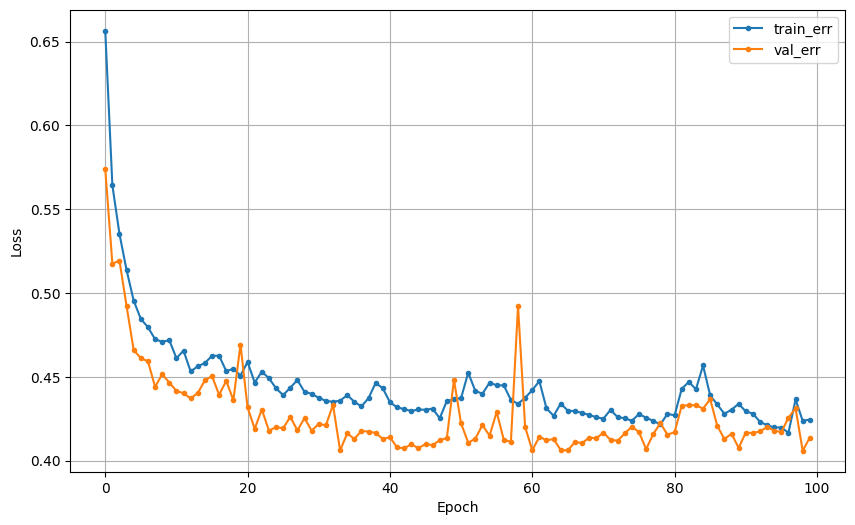

In [47]:
dl_history_plot(history)

In [48]:
pred = model.predict(x_val)
pred = np.where(pred >= .5, 1, 0)
print(classification_report(y_val, pred))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
              precision    recall  f1-score   support

           0       0.78      0.94      0.85       170
           1       0.84      0.53      0.65        98

    accuracy                           0.79       268
   macro avg       0.81      0.74      0.75       268
weighted avg       0.80      0.79      0.78       268

